## Estimation and analyzing data
The topics like exploratory data analysis and data cleaning are preliminary part of extracting data. Statistical inference is the process of analyzing sample data to gain insight into the population

#### Point Estimators

Point estimators are defined as the funcitons that are used to find approximate value of population parameter from random samples of the population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import math

Let us create an fake population points to estimate averate spending of the aviation industry. Also, we will take random samples to get sample mean from the population. 

Also, the sample mean is not same as population mean. The difference can be caused because of poor data values, biased sampling methods while drawing a sample from population. Let us investigate the point estimate by generating frequent and occasional travellers.

In [2]:
# Generate data related to aviation profits

np.random.seed(10)

#Generate data for frequent business travellers
segment1_spending = stats.poisson.rvs(loc = 600, mu = 160, size = 150000)

#Generate data for occasional leisure travellers
segment2_spending = stats.poisson.rvs(loc = 200, mu = 100, size = 100000)

#Concatenate the data from both segments
population_customer_spending = np.concatenate((segment1_spending, segment2_spending))

# Calculate the mean spending across all customers
population_customer_spending.mean()

576.007548

In [3]:
# Now let's understand, how sampling gets the close value in the population

np.random.seed(10)
sample_mean_spending = np.random.choice(a = population_customer_spending, 
                                        size = 600)
print(sample_mean_spending.mean())

print("Difference between the population and sample mean is")
print(population_customer_spending.mean() - sample_mean_spending.mean())

563.305
Difference between the population and sample mean is
12.702548000000093


By using point estimation method, we got the difference around 12.7 extra euros, but it is almost close to population value. Infact, we can get a fair accurate value by sampling a small subset of individual customers. 


 ### Proportion of population

This statistics tool can be used to point estimation the proportion of population that belongs to some subgroup

In [4]:
random.seed(11)
customer_segment_spending = (["high_level"] * 124000) +\
                             (["upper-mid_level"] * 60000) +\
                              (["lower-mid_level"] * 50000) +\
                                (["lower_level"] * 1000)

demo_sample = random.sample(customer_segment_spending, 1000)

for segment in set(demo_sample):
    print(segment + " proportion estimate :")
    print(demo_sample.count(segment) / 1000)

lower_level proportion estimate :
0.004
upper-mid_level proportion estimate :
0.272
lower-mid_level proportion estimate :
0.187
high_level proportion estimate :
0.537


In reality, the population estimate should be 52.7% for high level, 25.5% for upper mid level, 21.27% for lower mid level and 0.04% for lower level. 

## Central limit theorem

The statistical procedure assume that data follows a normal distribution, because the data is clustered in the mean and has low value of standard deviations of the mean.

But in reality, the data is not normally distributed and they are skewed. Also, the samples drawn from the real world data is also skewed.

-0.40489596318471666


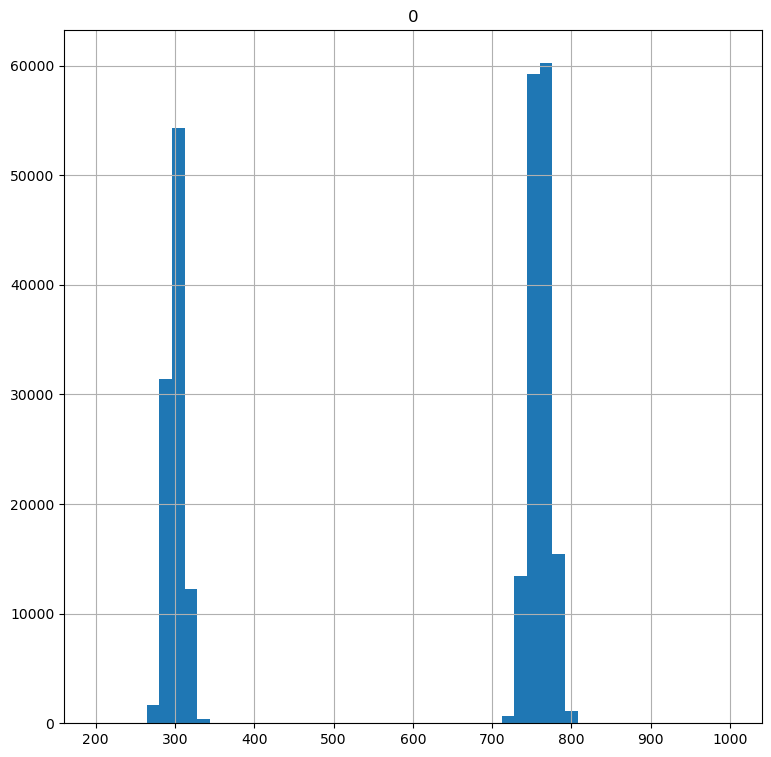

In [5]:
pd.DataFrame(population_customer_spending).hist(bins = 50,
                                   range = (200, 1000),
                                   figsize = (9, 9))
print(stats.skew(population_customer_spending))

-0.3011082592906401


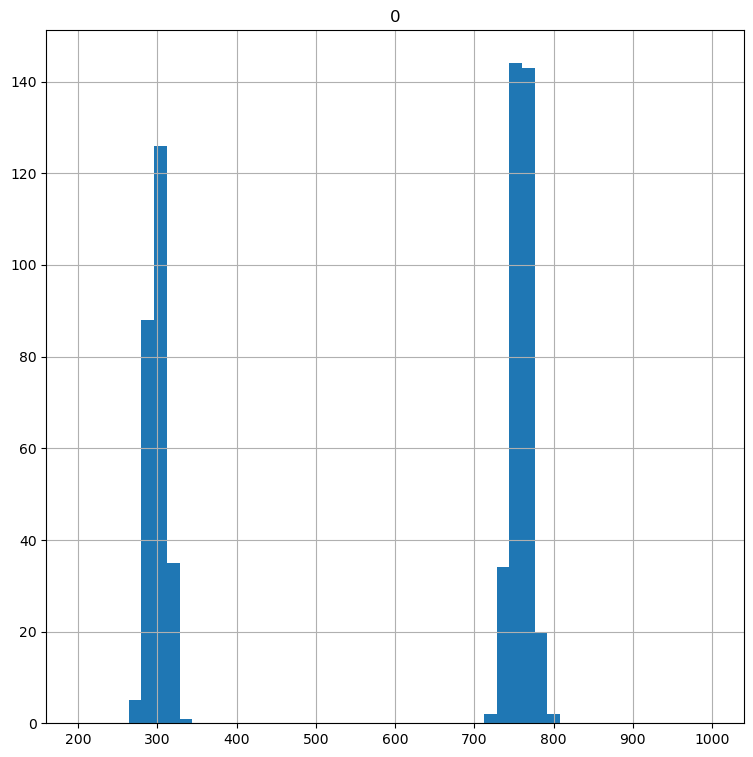

In [6]:
pd.DataFrame(sample_mean_spending).hist(bins = 50,
                                   range = (200, 1000),
                                   figsize = (9, 9))
print(stats.skew(sample_mean_spending))

Since, the distribution is not normal, we cannot apply techniques that assumes a normal distribution. However, due to central limit theorem, the distribution will be normally distributed. 

<Axes: ylabel='Density'>

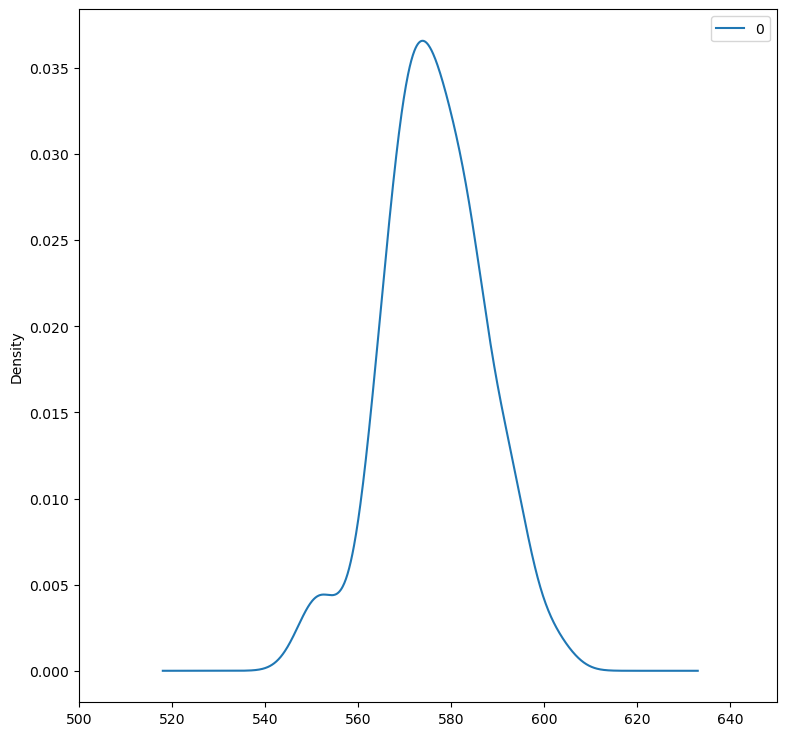

In [7]:
# Taking 200 samples from population to point estimates of the mean

np.random.seed(20)

point_estimates = []

for x in range(200):
    sample = np.random.choice(a = population_customer_spending, size = 500)
    point_estimates.append((sample.mean()))

pd.DataFrame(point_estimates).plot(kind = 'density',
                                   figsize = (9,9),
                                   xlim= (500, 650))

In [8]:
population_customer_spending.mean() - np.array(point_estimates).mean()

-0.32284199999992325

Estimates are prone to error and mutliple samplees to get improved estimates may not work every time. Hence, the concept of confidence interval is used. 

Confidence interval is a range of values which is above and below the point estimate and that captures the true population parameter with predetermined confidence level. 

Also, higher confidence interval leads to wide range of values. The confidence interval is calculated by adding and subtracting the margin of error.

Margin of error = z-critical value * (standard deviation) / sqrt (sample size)

In [9]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a = population_customer_spending, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975) # Get z- critical value

print("z-critical value : ")
print(z_critical)

pop_stdev = population_customer_spending.std()

margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval :", confidence_interval )

z-critical value : 
1.959963984540054
Confidence interval : (551.6222165389462, 579.5937834610537)


In [10]:
# Writing this program to show the error plot

np.random.seed(21)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a = population_customer_spending, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)

    pop_stdev = population_customer_spending.std()

    margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))

    confidence_interval = (sample_mean + margin_of_error,
                           sample_mean - margin_of_error)
    
    intervals.append(confidence_interval)

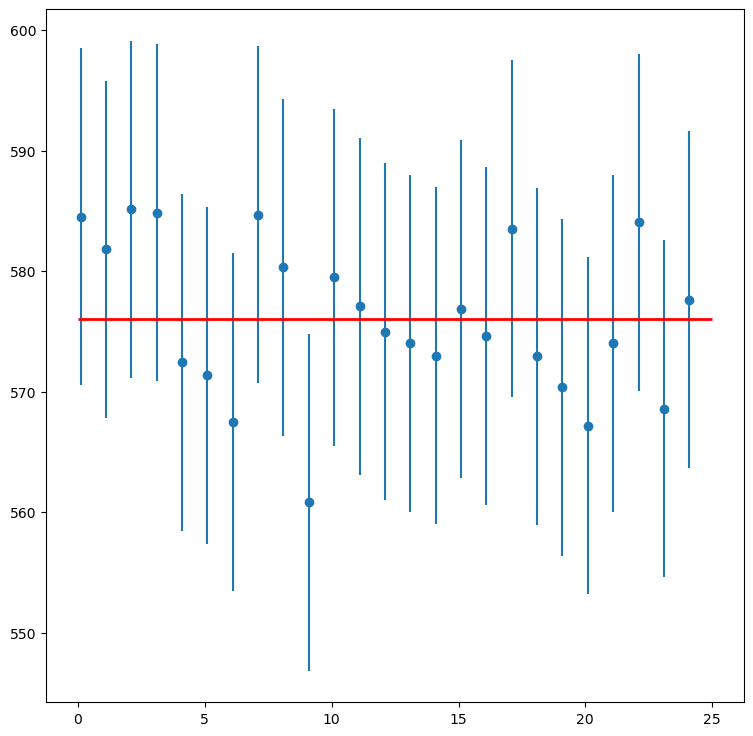

In [11]:
plt.figure(figsize = (9, 9))

plt.errorbar(x = np.arange(0.1, 25, 1),
             y = sample_means,
             yerr = [(top-bot)/2 for top, bot in intervals],
             fmt = 'o')

plt.hlines(xmin = 0, xmax = 25,
           y = 576.007548,
           linewidth = 2.0,
           color = "red")

 For the above example, we knew the standard deviation for the entire popultion. So, we used z-score to calculate the confidence interval. 

 In case of not knowing the value of standard devaition of population, we use the standard deviation of the sample. Because, there is a issue of  standard deviation of the sample may not match with the standard deviation of the populaiton.

 Therefore, we use t-critical value instead of z-critical value and t-critical value is dreaen from t-distribution. 


#### Calculation of confidence interval using t-distribution

Program to create a new, small sample and then create a confidence interval without the  population standard deviation, using t- distribution

In [12]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a = population_customer_spending, size = sample_size)
sample_mean = sample.mean()

# We need 97.5% with 24 degrees of freedom (df = n-1)
t_critical = stats.t.ppf(q = 0.975, df = 24) 

print("t-critical value :", t_critical)

sample_stdev = sample.std(ddof = 1) #ddof = 1 indicates N-1

sigma = sample_stdev / math.sqrt(sample_size)
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval", confidence_interval)

t-critical value : 2.0638985616280205
Confidence interval (503.3932044822744, 685.8867955177255)


Note : when using the t-distribution, we have to mention the degrees of freedom. The degrees of freedom is equal to sample size minus 1. In case of a large sample size , the t-distribution approaches the normal distribution.  

Also, in the above case, we can observe that t-critical value is larger than z-critical value for 95% value. Value increases to cover up the difference between using sample stamdard devoiation instead of population standard deviation.


In [13]:
# Difference between critical values with a sample size of 1000

stats.t.ppf(q = 0.975, df = 999) - stats.norm.ppf(0.975)

0.0023774765933946007

The below function can be used to calculate the critical values instead of doing by hand

In [14]:
stats.t.interval(confidence = 0.95,
                 df = 24,
                 loc = sample_mean,
                 scale = sigma) # standard deviation estimate

(503.3932044822744, 685.8867955177255)

We can also make a confidence interval for a point estimate of a population proportion. The margin of error is given by

Margin of error = z-critical value * sqrt(p * (1-p) / n) 

p = point estimate of the population proportion

n = sample size

If we wish to have a confidence interval that covers with probability $(1 - \alpha)$ (so $(\alpha = 0.05)$ to have 95% coverage probability), then $(z_q)$ should be set to the $(\frac{1 - \alpha}{2})$ quantile of the standardized estimate, where $(\frac{1 - \alpha}{2} = 0.975)$ for a 95% confidence interval.

In [20]:
z_critical = stats.norm.ppf(0.975) # z-critical value
p = 0.272 # point estimate of upper_mid level estimation as calculated above
n = 1000 # sample size

margin_of_error = z_critical * math.sqrt((p * (1 - p)) / n)

confidence_interval = (p - margin_of_error,
                       p + margin_of_error)

confidence_interval

(0.24441974782859, 0.29958025217141004)

The true population parameter we took was 25.5% and we can observe that the confidence interval is between 24.44% and 29.95%.

The above operation can be done by using stats.norm.interval libary package as shown below 

In [22]:
stats.norm.interval(confidence = 0.95,
                    loc = 0.272,
                    scale = math.sqrt((p * (1 - p)) / n))  # scaling factor

(0.24441974782859, 0.29958025217141004)